In [1]:
# import modules
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2025-09-25 09:37:25--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2025-09-25 09:37:25 (33.6 MB/s) - ‘moore.csv’ saved [2302/2302]



In [14]:
data = pd.read_csv('moore.csv', header=None).to_numpy()

In [21]:
X = data[:,0].reshape(-1,1)
y = data[:,1]

In [36]:
X = X - X.mean()
y = np.log(y)

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

In [38]:
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
)

In [39]:
# Set a learning rate scheduler. With more epochs lr will be slower
def schedule(epoch):
  return 0.001 if epoch < 50 else 0.0001


In [40]:
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [41]:
r = model.fit(X, y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 422.4295 - learning_rate: 0.0010
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 345.9573 - learning_rate: 0.0010
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 246.0893 - learning_rate: 0.0010
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 259.3590 - learning_rate: 0.0010
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 171.9135 - learning_rate: 0.0010
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 140.1235 - learning_rate: 0.0010
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 116.5054 - learning_rate: 0.0010
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 82.2122 - learning_rate: 0.0010
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 49.1466 - learning_rate: 0.0010
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 60.8779 - learning_rate: 0.0010
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 52.1294 - learning_rate: 0.0010
Epoch 12/20

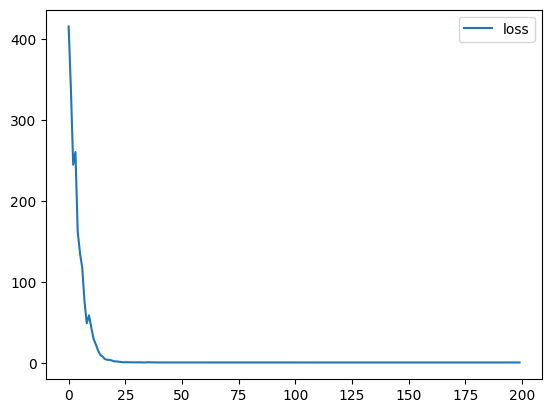

In [42]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.legend()
plt.show();

In [63]:
model.layers[0].get_weights()

[array([[0.3409699]], dtype=float32), array([17.743292], dtype=float32)]